<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.308209,48.340609,48.128128,37.834198,-0.017212,165.593932,165.625705,-0.031773
1,0.0,1.0,73.947941,34.018126,47.750472,39.963921,-0.045070,205.635391,205.664301,-0.028910
2,0.0,2.0,72.302908,57.351251,36.473663,91.287063,0.046622,267.461508,267.397320,0.064188
3,0.0,3.0,23.723891,64.688209,96.130933,69.943793,0.006655,264.493480,264.497787,-0.004306
4,0.0,4.0,43.581473,46.816449,22.035373,69.495808,-0.083609,191.845493,191.927235,-0.081741
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.279996,66.757119,93.978865,42.390737,-0.100987,255.305730,255.395591,-0.089861
249996,999.0,246.0,90.687021,42.635585,69.058327,68.357086,-0.116789,280.621229,280.742038,-0.120809
249997,999.0,247.0,98.966621,33.498867,43.836099,56.739587,0.107572,243.148746,243.052631,0.096115
249998,999.0,248.0,47.573054,23.598160,93.535919,86.580628,0.294553,261.582314,261.259493,0.322821


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,21.308209,48.340609,48.128128,37.834198,-0.017212,165.593932,165.625705,-0.031773
1,0.0,1.0,73.947941,34.018126,47.750472,39.963921,-0.045070,205.635391,205.664301,-0.028910
2,0.0,2.0,72.302908,57.351251,36.473663,91.287063,0.046622,267.461508,267.397320,0.064188
3,0.0,3.0,23.723891,64.688209,96.130933,69.943793,0.006655,264.493480,264.497787,-0.004306
4,0.0,4.0,43.581473,46.816449,22.035373,69.495808,-0.083609,191.845493,191.927235,-0.081741
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,42.279996,66.757119,93.978865,42.390737,-0.100987,255.305730,255.395591,-0.089861
249996,999.0,246.0,90.687021,42.635585,69.058327,68.357086,-0.116789,280.621229,280.742038,-0.120809
249997,999.0,247.0,98.966621,33.498867,43.836099,56.739587,0.107572,243.148746,243.052631,0.096115
249998,999.0,248.0,47.573054,23.598160,93.535919,86.580628,0.294553,261.582314,261.259493,0.322821


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    21.308209  48.340609  48.128128  37.834198 -0.017212  165.593932   
      1.0    73.947941  34.018126  47.750472  39.963921 -0.045070  205.635391   
      2.0    72.302908  57.351251  36.473663  91.287063  0.046622  267.461508   
      3.0    23.723891  64.688209  96.130933  69.943793  0.006655  264.493480   
      4.0    43.581473  46.816449  22.035373  69.495808 -0.083609  191.845493   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  42.279996  66.757119  93.978865  42.390737 -0.100987  255.305730   
      246.0  90.687021  42.635585  69.058327  68.357086 -0.116789  280.621229   
      247.0  98.966621  33.498867  43.836099  56.739587  0.107572  243.148746   
      248.0  47.573054  23.598160  93.535919  86.580628  0.294553  261.582314   
      249.0  65.195832  45.726992  56.942212  28.668556  0.111591  206.645183   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.625705 -0.031773  
      1.0    205.664301 -0.028910  
      2.0    267.397320  0.064188  
      3.0    264.497787 -0.004306  
      4.0    191.927235 -0.081741  
...                 ...       ...  
999.0 245.0  255.395591 -0.089861  
      246.0  280.742038 -0.120809  
      247.0  243.052631  0.096115  
      248.0  261.259493  0.322821  
      249.0  206.536182  0.109001  

[250000 rows x 8 columns]

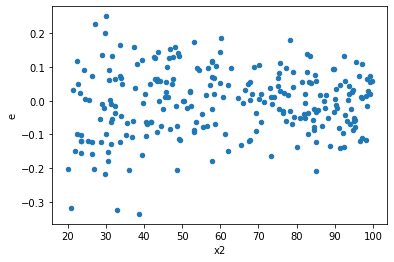

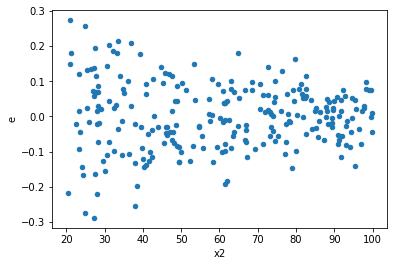

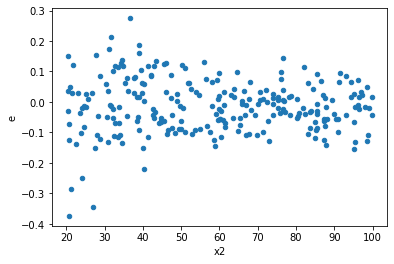

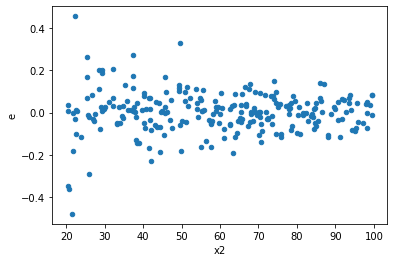

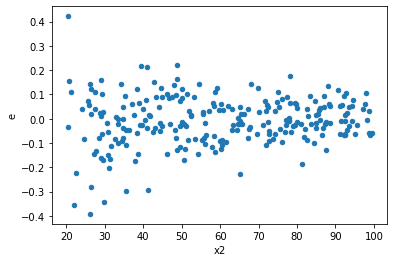

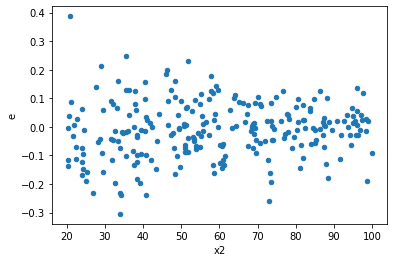

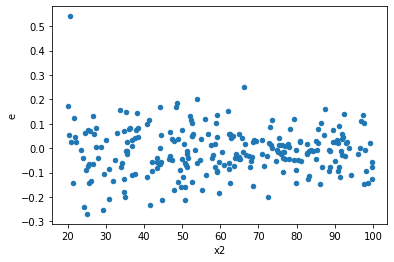

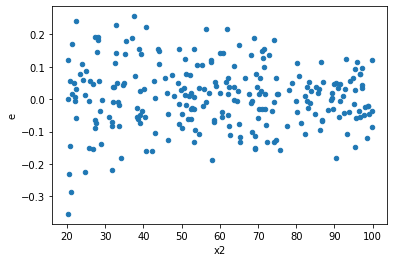

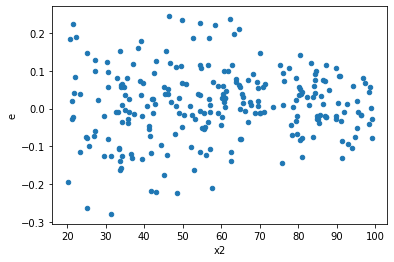

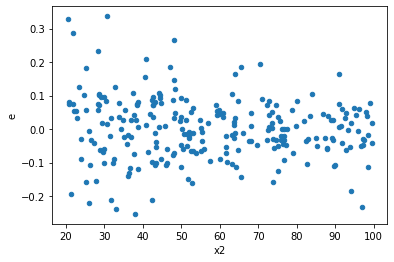

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,120.0,122.0,1.0269175429142845,1.3015418870327307,0.00855764619095237,0.010668376123219104,1.24664842237791,0.2264220840684581,0.886788957965771,0.11321104203422905,Reject001=1 : Homoscedasticity
1.0,103.0,139.0,0.7340499236360035,1.397078385214025,0.007126698287728189,0.010050923634633273,1.4103197902934168,0.059212986125062095,0.970393506937469,0.029606493062531047,Reject001=1 : Homoscedasticity
2.0,124.0,118.0,0.7082260471747428,1.1746124386996186,0.005711500380441474,0.009954342700844226,1.7428595006194851,0.002522528989113093,0.9987387355054435,0.0012612644945565465,Reject001=0 : Heteroscedasticity
5.0,113.0,129.0,0.9013741532089482,1.4297619618239876,0.007976762417778303,0.011083426060651066,1.3894642312460943,0.07062800151310511,0.9646859992434474,0.035314000756552555,Reject001=1 : Homoscedasticity
6.0,123.0,119.0,0.8344386352403156,1.417729477551678,0.006784053945043216,0.011913693088669563,1.7561318328511122,0.0021794079899495333,0.9989102960050252,0.0010897039949747667,Reject001=0 : Heteroscedasticity
8.0,122.0,120.0,0.8307063890640829,1.3266637585627885,0.006809068762820352,0.01105553132135657,1.6236480650222296,0.00816768959459857,0.9959161552027007,0.004083844797299285,Reject001=0 : Heteroscedasticity
9.0,130.0,112.0,0.8573247240872037,1.2274242166076672,0.006594805569901567,0.010959144791139885,1.6617843657373297,0.00607461761021133,0.9969626911948943,0.003037308805105665,Reject001=0 : Heteroscedasticity
12.0,119.0,123.0,0.9004443411166035,1.19823346938384,0.007566759169047089,0.009741735523445852,1.2874382950227643,0.1655419133311351,0.9172290433344324,0.08277095666556755,Reject001=1 : Homoscedasticity
14.0,145.0,97.0,0.9388150283181346,0.8195896742023466,0.006474586402194032,0.008449378084560274,1.3050066150475725,0.1599247622239508,0.9200376188880246,0.0799623811119754,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,122.0,1.0269175429142845,1.3015418870327307,0.00855764619095237,0.010668376123219104,1.24664842237791,0.2264220840684581,Reject001=1 : Homoscedasticity
1.0,103.0,139.0,0.7340499236360035,1.397078385214025,0.007126698287728189,0.010050923634633273,1.4103197902934168,0.059212986125062095,Reject001=1 : Homoscedasticity
2.0,124.0,118.0,0.7082260471747428,1.1746124386996186,0.005711500380441474,0.009954342700844226,1.7428595006194851,0.002522528989113093,Reject001=0 : Heteroscedasticity
3.0,110.0,132.0,1.760768799437718,0.6094895530055418,0.016006989085797434,0.004617345098526832,0.2884580650225892,9.319591617685939e-11,Reject001=0 : Heteroscedasticity
4.0,129.0,113.0,1.7111322307381314,0.7690078271987831,0.013264590935954506,0.006805379001759143,0.5130485391232635,0.000259916530187436,Reject001=0 : Heteroscedasticity
5.0,113.0,129.0,0.9013741532089482,1.4297619618239876,0.007976762417778303,0.011083426060651066,1.3894642312460943,0.07062800151310511,Reject001=1 : Homoscedasticity
6.0,123.0,119.0,0.8344386352403156,1.417729477551678,0.006784053945043216,0.011913693088669563,1.7561318328511122,0.0021794079899495333,Reject001=0 : Heteroscedasticity
7.0,115.0,127.0,1.2224491057340872,1.1515559787271963,0.01062999222377467,0.009067369911237766,0.8529987341813856,0.38594490603770415,Reject001=1 : Homoscedasticity
8.0,122.0,120.0,0.8307063890640829,1.3266637585627885,0.006809068762820352,0.01105553132135657,1.6236480650222296,0.00816768959459857,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      598
Reject001=0 : Heteroscedasticity    402
Name: Result_test, dtype: int64